### Custom embedder for parametric UMAP. 
This notebook shows you how to run a UMAP projection with a custom embedder. 

In [2]:
import tensorflow_probability as tfp

In [3]:
tfp.__version__

'0.12.2'

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.4.1'

### load data

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

### create parametric umap model

In [7]:
from umap.parametric_umap import ParametricUMAP

In [8]:
embedder = ParametricUMAP(
    global_correlation_loss_weight = 0.1, 
    n_epochs=25,
    verbose=True
)

In [9]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(global_correlation_loss_weight=0.1,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f6c166c6730>)
Construct fuzzy simplicial set
Tue Apr 20 09:13:20 2021 Finding Nearest Neighbors
Tue Apr 20 09:13:20 2021 Building RP forest with 17 trees
Tue Apr 20 09:13:21 2021 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Tue Apr 20 09:13:30 2021 Finished Nearest Neighbor Search
Tue Apr 20 09:13:32 2021 Construct embedding


/mnt/cube/tsainbur/Projects/github_repos/umap/umap/parametric_umap.py:303: UserWarning: Setting tensorflow to run eagerly for global_correlation_loss.
  warn("Setting tensorflow to run eagerly for global_correlation_loss.")


Epoch 1/10
923/923 [==============================] - 29s 31ms/step - loss: 0.2051 - global_correlation_loss: -0.6232 - umap_loss: 0.2674
Epoch 2/10
923/923 [==============================] - 34s 37ms/step - loss: 0.1035 - global_correlation_loss: -0.6369 - umap_loss: 0.1671
Epoch 3/10
923/923 [==============================] - 30s 32ms/step - loss: 0.0875 - global_correlation_loss: -0.6163 - umap_loss: 0.1491
Epoch 4/10
923/923 [==============================] - 29s 32ms/step - loss: 0.0784 - global_correlation_loss: -0.6051 - umap_loss: 0.1389
Epoch 5/10
923/923 [==============================] - 29s 31ms/step - loss: 0.0725 - global_correlation_loss: -0.6000 - umap_loss: 0.1325
Epoch 6/10
923/923 [==============================] - 29s 31ms/step - loss: 0.0683 - global_correlation_loss: -0.5937 - umap_loss: 0.1276
Epoch 7/10
923/923 [==============================] - 28s 31ms/step - loss: 0.0644 - global_correlation_loss: -0.5900 - umap_loss: 0.1234
Epoch 8/10
923/923 [==============

### plot results

In [10]:
embedding = embedder.embedding_

In [11]:
import matplotlib.pyplot as plt

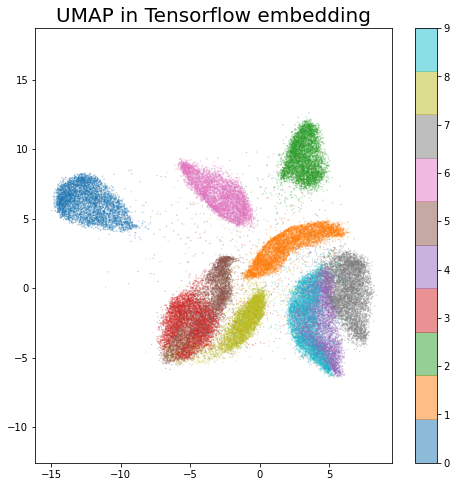

In [12]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int)[:len(embedding)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### measure at global structure as correlation of pairwise distances

In [13]:
import numpy as np
import scipy.stats
import sklearn

In [14]:
nex = 1000
sample1 = np.random.randint(len(train_images), size=nex)
sample2 = np.random.randint(len(train_images), size=nex)
x1 = train_images[sample1]
x2 = train_images[sample2]
z1 = embedding[sample1]
z2 = embedding[sample2]
x_dist = sklearn.metrics.pairwise_distances(x1, x2).flatten()

z_dist = sklearn.metrics.pairwise_distances(z1, z2).flatten()

corr, p = scipy.stats.pearsonr(x_dist, z_dist)
print("r^2={}, p={}".format(corr, p))

r^2=0.5481080601471058, p=0.0


Text(0, 0.5, 'Embedding distances')

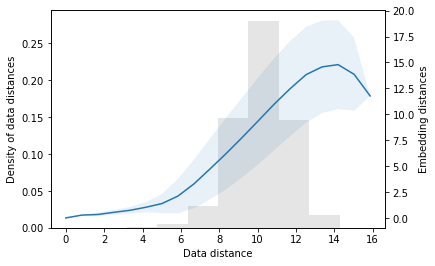

In [15]:
fig, ax = plt.subplots()

ax.hist(x_dist, color = 'k', alpha = 0.1, density=True)
ax.set_ylabel('Density of data distances')
ax.set_xlabel('Data distance')

ax2 = ax.twinx()
bins = np.linspace(np.min(x_dist), np.max(x_dist), 20)
xbins = np.digitize(x_dist, bins = bins)
zmean = np.array([np.mean(z_dist[xbins == i]) for i in np.unique(xbins)])
zstd = np.array([np.std(z_dist[xbins == i]) for i in np.unique(xbins)])
ax2.plot(bins, zmean)
ax2.fill_between(bins, zmean-zstd, zmean+zstd, alpha = 0.1)
ax2.set_ylabel('Embedding distances')


### plotting loss

In [16]:
embedder._history.keys()

dict_keys(['loss', 'global_correlation_loss', 'umap_loss'])

Text(0, 0.5, 'global_correlation_loss')

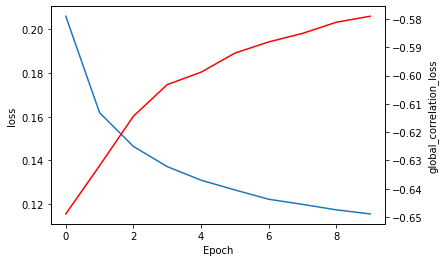

In [17]:
fig, ax = plt.subplots()
ax.plot(embedder._history['umap_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('Epoch')
ax2 = ax.twinx()
ax2.plot(embedder._history['global_correlation_loss'], color = 'r')
ax2.set_ylabel('global_correlation_loss')


## Repeat with more global structure

### create parametric umap model

In [18]:
embedder = ParametricUMAP(
    global_correlation_loss_weight = 1.0,
    n_epochs=25,
    verbose=True
)

In [19]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(global_correlation_loss_weight=1.0,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f6c35fc4550>)
Construct fuzzy simplicial set
Tue Apr 20 09:18:37 2021 Finding Nearest Neighbors
Tue Apr 20 09:18:37 2021 Building RP forest with 17 trees
Tue Apr 20 09:18:38 2021 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Tue Apr 20 09:18:40 2021 Finished Nearest Neighbor Search
Tue Apr 20 09:18:41 2021 Construct embedding


/mnt/cube/tsainbur/Projects/github_repos/umap/umap/parametric_umap.py:303: UserWarning: Setting tensorflow to run eagerly for global_correlation_loss.
  warn("Setting tensorflow to run eagerly for global_correlation_loss.")


Epoch 1/10
923/923 [==============================] - 29s 31ms/step - loss: -0.4368 - global_correlation_loss: -0.7290 - umap_loss: 0.2921
Epoch 2/10
923/923 [==============================] - 31s 33ms/step - loss: -0.5582 - global_correlation_loss: -0.7693 - umap_loss: 0.2110
Epoch 3/10
923/923 [==============================] - 30s 33ms/step - loss: -0.5634 - global_correlation_loss: -0.7673 - umap_loss: 0.2039
Epoch 4/10
923/923 [==============================] - 31s 33ms/step - loss: -0.5674 - global_correlation_loss: -0.7681 - umap_loss: 0.2007
Epoch 5/10
923/923 [==============================] - 30s 33ms/step - loss: -0.5694 - global_correlation_loss: -0.7678 - umap_loss: 0.1983
Epoch 6/10
923/923 [==============================] - 31s 33ms/step - loss: -0.5731 - global_correlation_loss: -0.7683 - umap_loss: 0.1952
Epoch 7/10
923/923 [==============================] - 29s 32ms/step - loss: -0.5729 - global_correlation_loss: -0.7668 - umap_loss: 0.1939
Epoch 8/10
923/923 [=======

### plot results

In [20]:
embedding = embedder.embedding_

In [21]:
import matplotlib.pyplot as plt

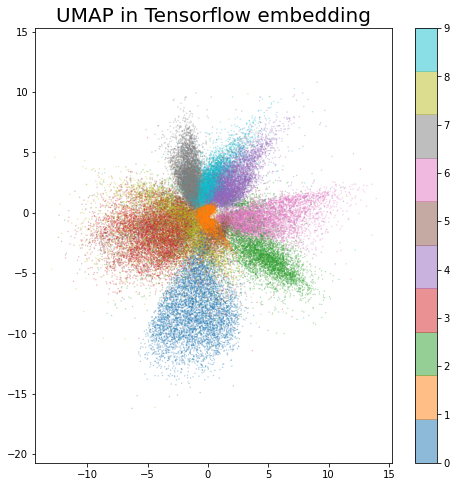

In [22]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int)[:len(embedding)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### measure at global structure as correlation of pairwise distances

In [23]:
import numpy as np
import scipy.stats
import sklearn

In [24]:
nex = 1000
sample1 = np.random.randint(len(train_images), size=nex)
sample2 = np.random.randint(len(train_images), size=nex)
x1 = train_images[sample1]
x2 = train_images[sample2]
z1 = embedding[sample1]
z2 = embedding[sample2]
x_dist = sklearn.metrics.pairwise_distances(x1, x2).flatten()

z_dist = sklearn.metrics.pairwise_distances(z1, z2).flatten()

corr, p = scipy.stats.pearsonr(x_dist, z_dist)
print("r^2={}, p={}".format(corr, p))

r^2=0.7568037641794829, p=0.0


In [25]:
np.unique(xbins), len(np.unique(xbins))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 20)

Text(0, 0.5, 'Embedding distances')

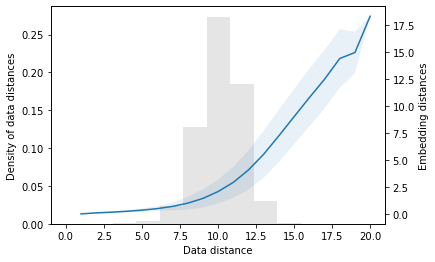

In [26]:
fig, ax = plt.subplots()

ax.hist(x_dist, color = 'k', alpha = 0.1, density=True)
ax.set_ylabel('Density of data distances')
ax.set_xlabel('Data distance')

ax2 = ax.twinx()
bins = np.linspace(np.min(x_dist), np.max(x_dist), 20)
xbins = np.digitize(x_dist, bins = bins)
zmean = np.array([np.mean(z_dist[xbins == i]) for i in np.unique(xbins)])
zstd = np.array([np.std(z_dist[xbins == i]) for i in np.unique(xbins)])
ax2.plot(np.unique(xbins), zmean)
ax2.fill_between(np.unique(xbins), zmean-zstd, zmean+zstd, alpha = 0.1)
ax2.set_ylabel('Embedding distances')


### plotting loss

In [27]:
embedder._history.keys()

dict_keys(['loss', 'global_correlation_loss', 'umap_loss'])

Text(0, 0.5, 'global_correlation_loss')

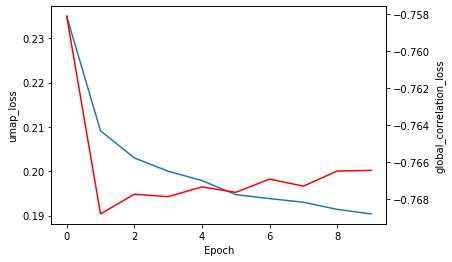

In [28]:
fig, ax = plt.subplots()
ax.plot(embedder._history['umap_loss'])
ax.set_ylabel('umap_loss')
ax.set_xlabel('Epoch')
ax2 = ax.twinx()
ax2.plot(embedder._history['global_correlation_loss'], color = 'r')
ax2.set_ylabel('global_correlation_loss')
